In [3]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from xgboost import XGBClassifier

In [6]:
from imblearn.over_sampling import RandomOverSampler

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [8]:
rain = pd.read_csv("Rainfall.csv")
rain

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [9]:
rain.shape

(366, 12)

In [10]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
rain.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


## Data Cleaning

In [12]:
rain.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [13]:
rain.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [14]:
# remove unnecessary spaces from columns name
rain.rename(str.strip,axis = 'columns',inplace = True)
rain.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [15]:
# null value imputation
for col in rain.columns:
    #checking if the column contains any null values
    if rain[col].isnull().sum() > 0:
        val = rain[col].mean()
        rain[col] = rain[col].fillna(val)
rain.isnull().sum().sum()

0

## EDA

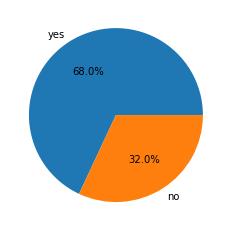

In [16]:
plt.pie(rain['rainfall'].value_counts().values,
       labels = rain['rainfall'].value_counts().index,
       autopct = '%1.1f%%')
plt.show()

In [17]:
rain.groupby('rainfall').mean().T


rainfall,no,yes
day,15.623932,15.819277
pressure,1014.576923,1013.350602
maxtemp,27.070940,25.777912
temparature,24.053846,23.603213
mintemp,21.957265,21.865060
dewpoint,18.766667,20.563454
humidity,73.000000,83.550201
cloud,51.256410,80.465863
sunshine,7.586325,2.931325
winddirection,103.076923,100.769104


- **Maxtemp is relatively lower on days of rainfall.**

- **Dewpoint value is higher on days of rainfall.**

- **Humidity is high on the days when rainfall is expected.**

- **Obviously, clouds must be there for rainfall.**

- **Sunshine is also less on days of rainfall.**

- **Windspeed is higher on days of rainfall.**

In [18]:
features = list(rain.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


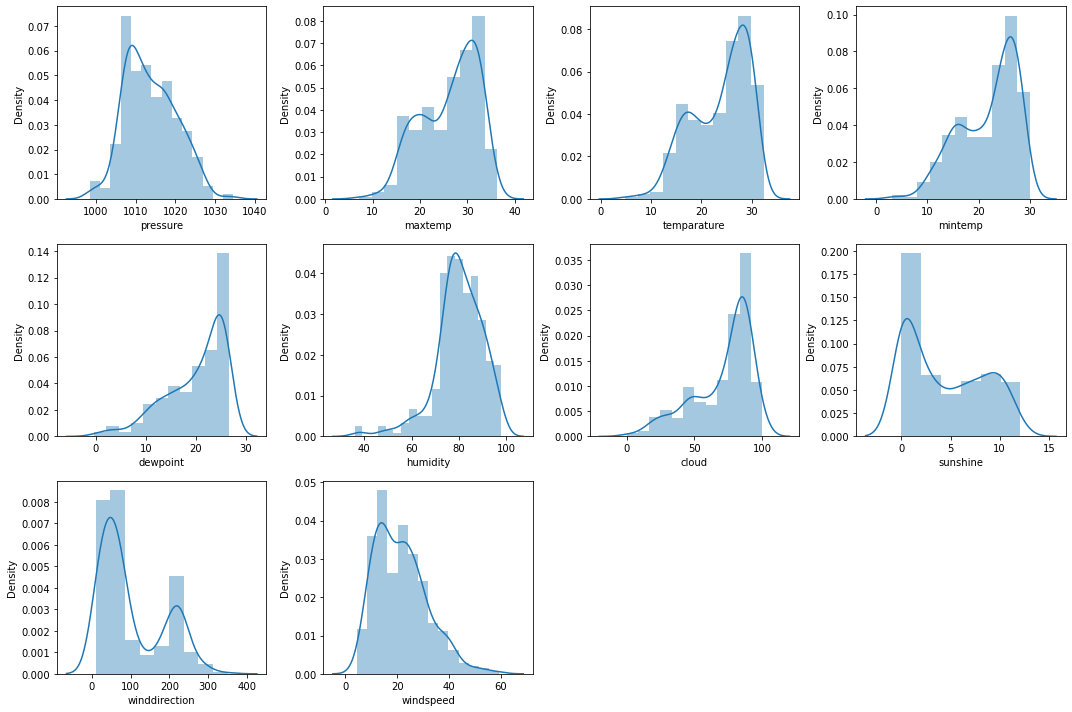

In [19]:
# The distribution of the continuous features given in the dataset.
plt.subplots(figsize=(15,10))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.distplot(rain[col])
plt.tight_layout()
plt.show()

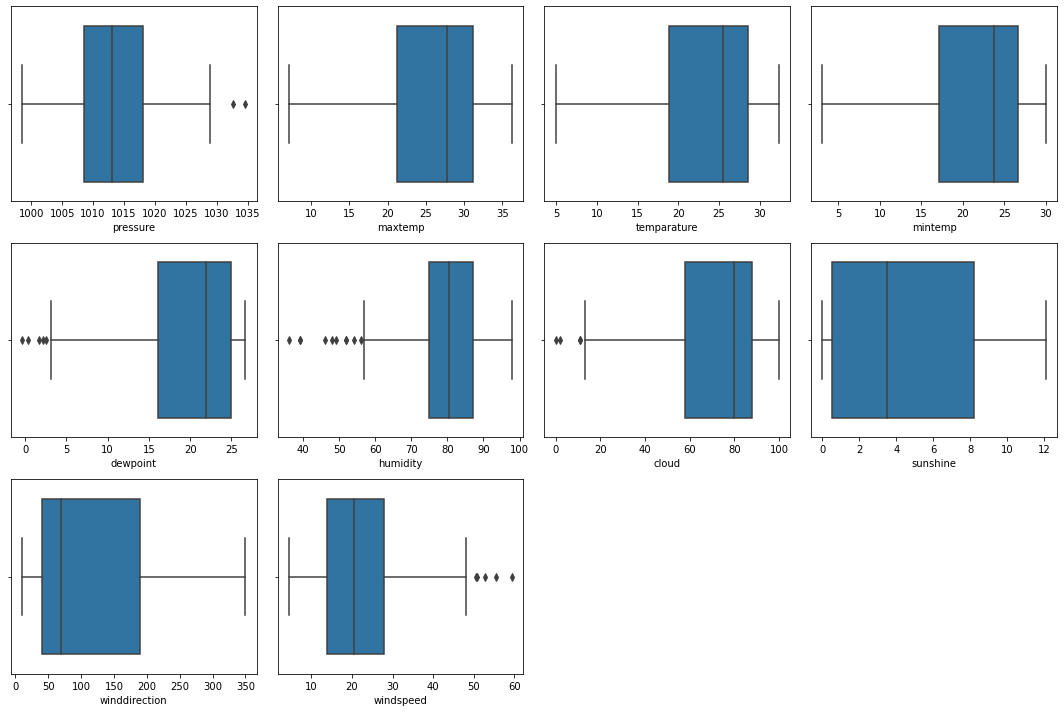

In [20]:
# Boxplots for the continuous variable to detect the outliers present in the data.
plt.subplots(figsize=(15,10))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.boxplot(rain[col])
plt.tight_layout()
plt.show()

There are outliers in the data but sadly we do not have much data so, we cannot remove this.

In [21]:
rain.replace({'yes':1, 'no':0}, inplace=True)

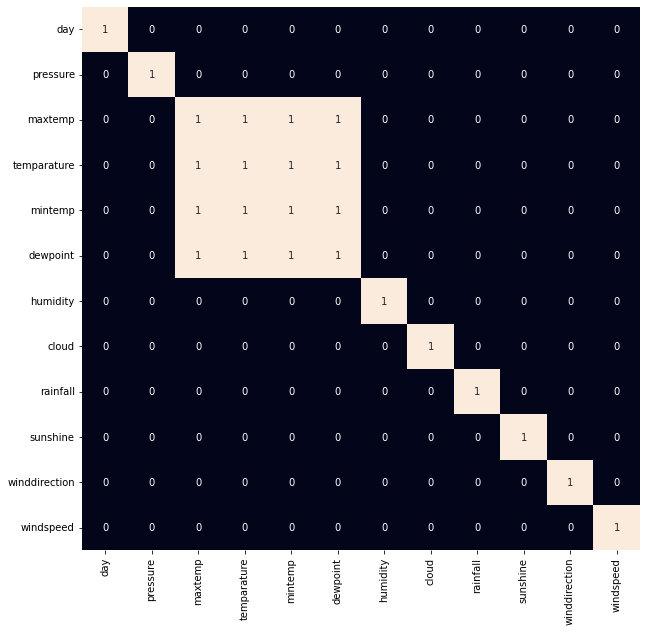

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(rain.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [23]:
rain.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)


Now we will remove the highly correlated features ‘maxtemp’ and ‘mintemp’. But we will not remove temp or dewpoint because temp and dewpoint provide distinct information regarding the weather and atmospheric conditions.

## Model Training

In [24]:
features = rain.drop(['day', 'rainfall'], axis=1)
target = rain.rainfall

In [25]:
X_train, X_val,Y_train, Y_val = train_test_split(features,target,test_size=0.2,stratify=target,random_state=2)

In [26]:
# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [27]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [28]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for model in models:
    model.fit(X, Y)
    print(f'{model.__class__.__name__}() :')
    
    train_preds = model.predict_proba(X)
    print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:, 1]))
    
    val_preds = model.predict_proba(X_val)
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:, 1]))
    print()


LogisticRegression() :
Training Accuracy :  0.8893209767430116
Validation Accuracy :  0.8966666666666667

XGBClassifier() :
Training Accuracy :  0.9999999999999999
Validation Accuracy :  0.8391666666666666

SVC() :
Training Accuracy :  0.9026413474407211
Validation Accuracy :  0.8858333333333333



we can say that Logistic Regression and support vector classifier are satisfactory as the gap between the training and the validation accuracy is low. 

## Model Evaluation

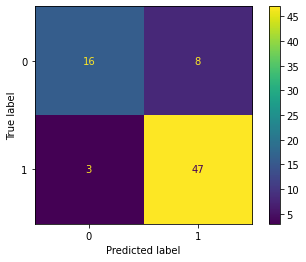

In [29]:
 from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(models[2], X_val, Y_val)
plt.show()


In [30]:
print(metrics.classification_report(Y_val,
                                    models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74



- **Logistic Regression appears to be the most stable model, with good generalization and balanced performance.**
- **XGBoost might need tuning (like adjusting n_estimators, max_depth, or adding regularization) to avoid overfitting.**
- **SVC performs relatively well but slightly underperforms compared to Logistic Regression in validation.**

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define StratifiedKFold (to maintain class distribution across folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(kernel='rbf', probability=True)
}

# Perform K-Fold Cross-Validation for each model
for name, model in models.items():
    print(f'{name} Cross-Validation Results:')
    
    # Use cross_val_score to calculate ROC-AUC score
    cv_results = cross_val_score(model, X, Y, cv=kf, scoring='roc_auc')
    
    print(f'Mean ROC-AUC: {np.mean(cv_results):.4f}')
    print(f'Standard Deviation: {np.std(cv_results):.4f}')
    print('Cross-Validation AUC Scores for each fold:', cv_results)
    print('-' * 50)


Logistic Regression Cross-Validation Results:
Mean ROC-AUC: 0.8794
Standard Deviation: 0.0284
Cross-Validation AUC Scores for each fold: [0.835625   0.916875   0.88875    0.86025641 0.89551282]
--------------------------------------------------
XGBoost Cross-Validation Results:
Mean ROC-AUC: 0.9180
Standard Deviation: 0.0329
Cross-Validation AUC Scores for each fold: [0.928125   0.955      0.93875    0.90833333 0.85961538]
--------------------------------------------------
SVM Cross-Validation Results:
Mean ROC-AUC: 0.8703
Standard Deviation: 0.0219
Cross-Validation AUC Scores for each fold: [0.854375   0.9025     0.885625   0.86794872 0.84102564]
--------------------------------------------------


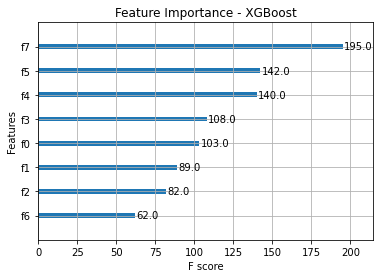

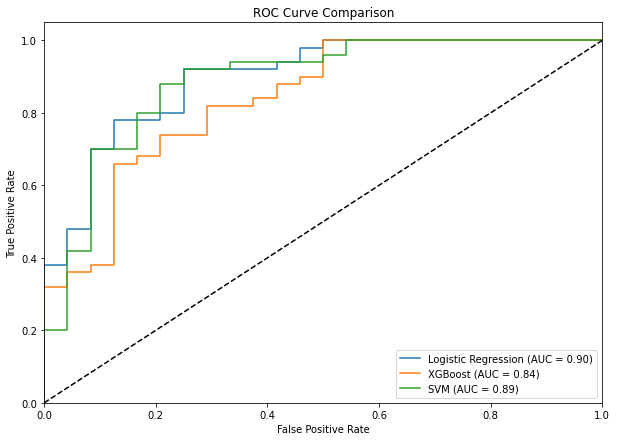

In [32]:

# Assuming X, Y, X_val, Y_val are already defined
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import xgboost as xgb

# Train XGBoost Model (XGBClassifier)
xgb_model = XGBClassifier()
xgb_model.fit(X, Y)

# Feature Importance for XGBoost
xgb.plot_importance(xgb_model, max_num_features=10)  # Top 10 important features
plt.title('Feature Importance - XGBoost')
plt.show()

# Plot ROC Curve for all models
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(kernel='rbf', probability=True)
}

plt.figure(figsize=(10, 7))
for name, model in models.items():
    model.fit(X, Y)
    val_preds = model.predict_proba(X_val)[:, 1]  # Get the probabilities for class 1
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(Y_val, val_preds)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


- **Logistic Regression has the highest AUC of 0.90, indicating it performs the best among the three models. This suggests it has a good balance between sensitivity (true positive rate) and specificity (1 - false positive rate)**
- **SVM follows closely with an AUC of 0.89, showing it also performs well, but slightly less effectively than Logistic Regression.**
- **XGBoost has the lowest AUC of 0.84, indicating it is the least effective model in this comparison. This could suggest that it may not be capturing the underlying patterns in the data as well as the other models.**

Model Selection: Based on the AUC values, Logistic Regression would be the preferred model for this classification task, followed closely by SVM.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

# Assuming X and Y are defined (your features and target)
# Handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],         # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Optimization algorithms
    'max_iter': [100, 200]     # Maximum number of iterations
}

# Perform GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, Y_train)

# Get the best model
best_lr_model = grid_search_lr.best_estimator_

# Optionally print the best parameters
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)


Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


In [1]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

# Generating synthetic data (replace this with your actual data)
X = pd.DataFrame({
    'pressure': np.random.uniform(1000.0, 2000.0, 400),
    'temparature': np.random.uniform(5.0, 40.0, 400),
    'dewpoint': np.random.uniform(1.0, 25.0, 400),
    'humidity': np.random.randint(0, 100, 400),
    'cloud': np.random.randint(0, 100, 400),
    'sunshine': np.random.uniform(0.0, 12.0, 400),
    'winddirection': np.random.uniform(0.0, 360.0, 400),
    'windspeed': np.random.uniform(0.0, 50.0, 400),
})
Y = np.random.choice(['yes', 'no'], size=400)

# Handle class imbalance and train the model
def train_logistic_model():
    ros = RandomOverSampler(random_state=42)
    X_resampled, Y_resampled = ros.fit_resample(X, Y)
    
    model = LogisticRegression()
    model.fit(X_resampled, Y_resampled)
    
    return model

# Load the Logistic Regression model
logistic_model = train_logistic_model()

# Prediction function
def predict_rainfall(pressure, temparature, dewpoint, humidity, cloud, sunshine, winddirection, windspeed):
    # Create a DataFrame with user inputs
    input_data = pd.DataFrame({
        'pressure': [pressure],
        'temparature': [temparature],
        'dewpoint': [dewpoint],
        'humidity': [humidity],
        'cloud': [cloud],
        'sunshine': [sunshine],
        'winddirection': [winddirection],
        'windspeed': [windspeed]
    })
    
    # Make prediction
    prediction = logistic_model.predict(input_data)
    prediction_proba = logistic_model.predict_proba(input_data)
    
    return f'Will it rain?: {prediction[0]}', f'Prediction Probability: {prediction_proba[0].round(2)}'

# Gradio Interface
iface = gr.Interface(
    fn=predict_rainfall,
    inputs=[
        gr.Slider(1000.0, 1200.0, value=1015.0, label='Pressure'),  # Updated range for pressure
        gr.Slider(5.0, 40.0, value=18.0, label='Temperature'),       # Updated range for temperature
        gr.Slider(1.0, 25.0, value=12.0, label='Dewpoint'),          # Updated range for dewpoint
        gr.Slider(0, 100, value=80, label='Humidity'),                # Humidity remains the same
        gr.Slider(0, 100, value=60, label='Cloud'),                   # Cloud remains the same
        gr.Slider(0.0, 12.0, value=5.0, label='Sunshine'),            # Sunshine remains the same
        gr.Slider(0.0, 360.0, value=180.0, label='Wind Direction'),   # Wind direction remains the same
        gr.Slider(0.0, 50.0, value=20.0, label='Windspeed'),          # Windspeed remains the same
    ],
    outputs=[
        gr.Textbox(label='Rainfall Prediction'),
        gr.Textbox(label='Prediction Probability')
    ],
    title='Rainfall Prediction App (Logistic Regression)',
    description='Enter the weather parameters to predict if it will rain.'
)

# Launch the Gradio app
iface.launch()


C:\Users\91993\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [36]:
rain.head(10)

,day,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,18.3,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,18.9,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,19.3,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,20.6,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,20.7,19.9,95,81,1,0.0,40.0,13.7
5,6,1018.8,20.9,18.0,84,51,1,7.7,20.0,14.5
6,7,1021.8,18.8,15.0,79,56,0,3.4,30.0,21.5
7,8,1020.8,18.4,14.4,78,28,0,7.7,60.0,14.3
8,9,1020.6,18.1,14.3,78,79,0,3.3,70.0,39.3
9,10,1017.5,18.0,15.5,85,91,1,0.0,70.0,37.7


In [39]:
import gradio as gr
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

# Generating synthetic data (replace this with your actual data)
X = pd.DataFrame({
    'pressure': np.random.uniform(1000.0, 1200.0, 400),
    'temparature': np.random.uniform(5.0, 40.0, 400),
    'dewpoint': np.random.uniform(1.0, 25.0, 400),
    'humidity': np.random.randint(0, 100, 400),
    'cloud': np.random.randint(0, 100, 400),
    'sunshine': np.random.uniform(0.0, 12.0, 400),
    'winddirection': np.random.uniform(0.0, 360.0, 400),
    'windspeed': np.random.uniform(0.0, 50.0, 400),
})
Y = np.random.choice(['yes', 'no'], size=400)

# Convert Y to binary format (1 for 'yes' and 0 for 'no')
Y_binary = np.where(Y == 'yes', 1, 0)

# Handle class imbalance and train the XGBoost model
def train_xgboost_model():
    ros = RandomOverSampler(random_state=42)
    X_resampled, Y_resampled = ros.fit_resample(X, Y_binary)
    
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_resampled, Y_resampled)
    
    return model

# Load the XGBoost model
xgboost_model = train_xgboost_model()

# Prediction function
def predict_rainfall(pressure, temparature, dewpoint, humidity, cloud, sunshine, winddirection, windspeed):
    # Create a DataFrame with user inputs
    input_data = pd.DataFrame({
        'pressure': [pressure],
        'temparature': [temparature],
        'dewpoint': [dewpoint],
        'humidity': [humidity],
        'cloud': [cloud],
        'sunshine': [sunshine],
        'winddirection': [winddirection],
        'windspeed': [windspeed]
    })
    
    # Make prediction
    prediction = xgboost_model.predict(input_data)
    prediction_proba = xgboost_model.predict_proba(input_data)
    
    # Convert prediction back to 'yes' or 'no'
    rain_prediction = 'yes' if prediction[0] == 1 else 'no'
    
    return f'Will it rain?: {rain_prediction}', f'Prediction Probability: {prediction_proba[0].round(2)}'

# Gradio Interface
iface = gr.Interface(
    fn=predict_rainfall,
    inputs=[
        gr.Slider(1000.0, 1200.0, value=1015.0, label='Pressure'),
        gr.Slider(5.0, 40.0, value=18.0, label='Temperature'),
        gr.Slider(1.0, 25.0, value=12.0, label='Dewpoint'),
        gr.Slider(0, 100, value=80, label='Humidity'),
        gr.Slider(0, 100, value=60, label='Cloud'),
        gr.Slider(0.0, 12.0, value=5.0, label='Sunshine'),
        gr.Slider(0.0, 360.0, value=180.0, label='Wind Direction'),
        gr.Slider(0.0, 50.0, value=20.0, label='Windspeed'),
    ],
    outputs=[
        gr.Textbox(label='Rainfall Prediction'),
        gr.Textbox(label='Prediction Probability')
    ],
    title='Rainfall Prediction App (XGBoost)',
    description='Enter the weather parameters to predict if it will rain.'
)

# Launch the Gradio app
iface.launch()


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [38]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

# Assuming X and Y are defined (your features and target)
# Convert Y to binary format if needed (0 for 'no' and 1 for 'yes')
Y_binary = np.where(Y == 'yes', 1, 0)

# Handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y_binary)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],         # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'max_depth': [3, 5, 7],                 # Maximum depth of a tree
    'subsample': [0.8, 1.0],                # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],         # Fraction of features used for training each tree
    'gamma': [0, 0.1, 0.2],                 # Minimum loss reduction to make a split
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, Y_train)

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Optionally print the best parameters
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)


Best parameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
